In [18]:
import json
import os
import pickle
import torch
import numpy as np
from collections import defaultdict
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Read JSON
def read_json(fname):
    retobj = []
    with open(fname, "r") as handle:
        res = handle.readlines()
        for r in res:
            obj = json.loads(r)
            retobj.append(obj)
    return retobj

In [3]:
train = read_json("../data/medmentions/mentions/train.json")
val = read_json("../data/medmentions/mentions/val.json")
test = read_json("../data/medmentions/mentions/test.json")
data = {'train': train, 'val': val, 'test': test}

In [4]:
modes = ['train', 'val', 'test']

In [5]:
# df_coref = pd.DataFrame([], columns=["count", "dataset", "split"])
# df_ambig = pd.DataFrame([], columns=["count", "dataset", "split"])
df_coref = {"count": [], "Dataset": [], "Split": []}

In [6]:
dataset = "MedMentions"
modestr = {'train': 'Train', 'val': 'Validation', 'test': 'Test'}
for mode in modes:
    coref = defaultdict(int)
#     ambig = defaultdict(set)

    for d in data[mode]:
        coref[d['label_document_id']] += 1
#         ambig[d['text']].add(d['label_document_id'])

#     for i in ambig:
#         df_ambig = df_ambig.append({"count": len(ambig[i]), "dataset": dataset, "split": mode}, ignore_index=True)
    for i in coref:
        df_coref["count"].append(coref[i])
        df_coref["Dataset"].append(dataset)
        df_coref["Split"].append(modestr[mode])
#         df_coref = df_coref.append({"count": coref[i], "Dataset": dataset, "Split": modestr[mode]}, ignore_index=True)

In [7]:
dataset = "ZeShEL"

ztrain = read_json("../data/zeshel/mentions/train.jsonl")
zval = read_json("../data/zeshel/mentions/valid.jsonl")
ztest = read_json("../data/zeshel/mentions/test.jsonl")
zdata = {'train': ztrain, 'val': zval, 'test': ztest}

for mode in modes:
    coref = defaultdict(int)
#     ambig = defaultdict(set)

    for d in zdata[mode]:
        coref[d['label_id']] += 1
#         ambig[d['mention']].add(d['label_id'])

#     for i in ambig:
#         df_ambig = df_ambig.append({"count": len(ambig[i]), "dataset": dataset, "split": mode}, ignore_index=True)
    for i in coref:
        df_coref["count"].append(coref[i])
        df_coref["Dataset"].append(dataset)
        df_coref["Split"].append(modestr[mode])
#         df_coref = df_coref.append({"count": coref[i], "Dataset": dataset, "Split": modestr[mode]}, ignore_index=True)

In [10]:
df_coref = pd.DataFrame(df_coref)

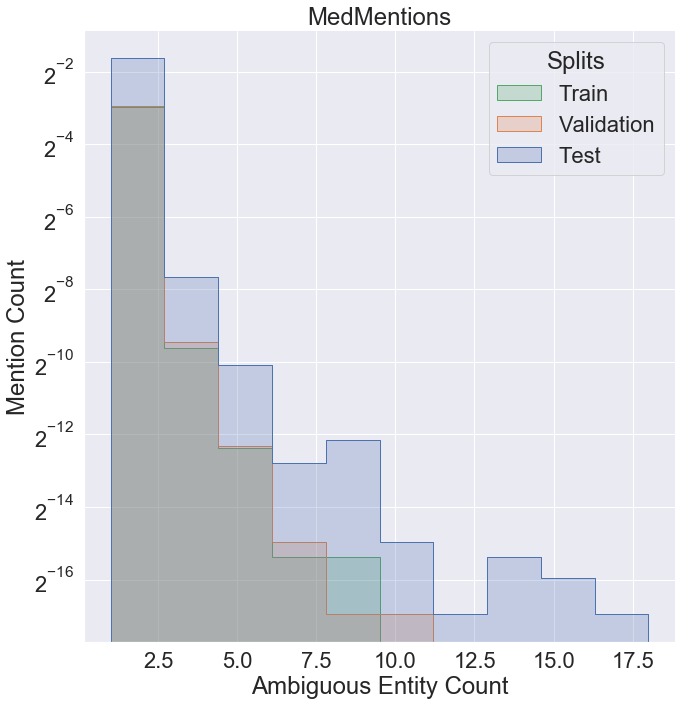

In [183]:
# MedMentions
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
# sns.set_theme(style="whitegrid")
sns.set(font_scale=2)

g = sns.displot(df_ambig[df_ambig.dataset=='medmentions'], fill=True, x="count",
                log_scale=[False,2], bins=10, element="step", height=10, hue="split", stat='density', 
                legend=False).set_axis_labels(
                    "Ambiguous Entity Count", "Mention Count").set(title='MedMentions')
plt.legend(title='Splits', loc='upper right', labels=['Train', 'Validation', 'Test'])

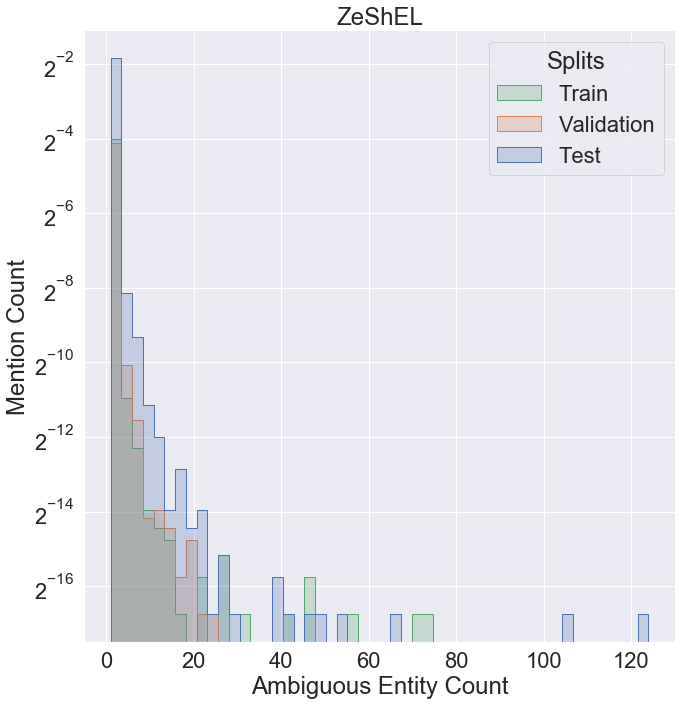

In [191]:
g = sns.displot(df_ambig[df_ambig.dataset=='zeshel'], fill=True, x="count",
                log_scale=[False,2], bins=50, element="step", height=10, hue="split", stat='density', 
                legend=False).set_axis_labels(
                    "Ambiguous Entity Count", "Mention Count").set(title='ZeShEL')
plt.legend(title='Splits', loc='upper right', labels=['Train', 'Validation', 'Test'])

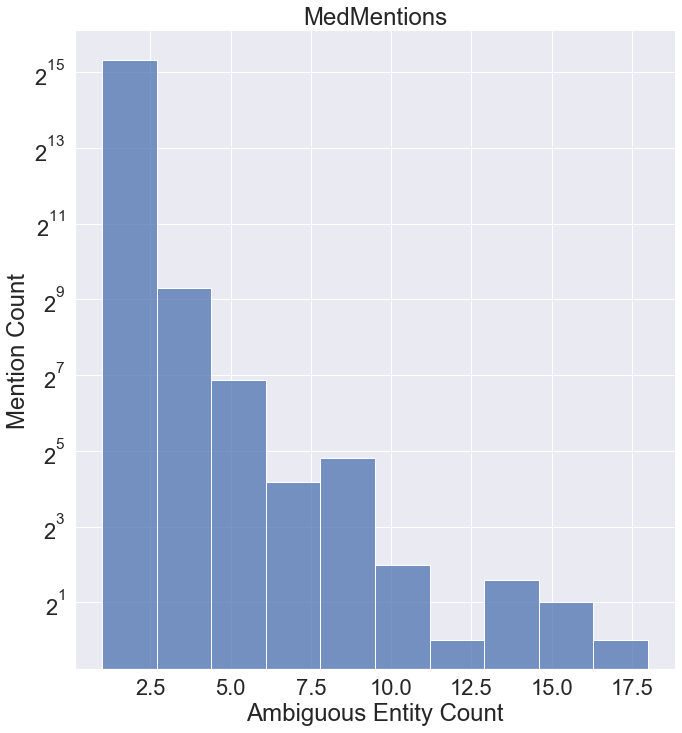

In [145]:
sns.set(font_scale=2)
sns.displot(np.array(ambig_counts), fill=True, 
            log_scale=[False,2], bins=10, height=10).set_axis_labels(
    "Ambiguous Entity Count", "Mention Count").set(title='MedMentions')


In [211]:
df_ambig[(df_ambig["dataset"]=='zeshel') & (df_ambig["count"]>=10) & (df_ambig["split"]=="test")]

,count,dataset,split
113291,73,zeshel,test
113331,14,zeshel,test
113332,27,zeshel,test
113374,46,zeshel,test
113378,46,zeshel,test
113390,70,zeshel,test
113453,28,zeshel,test
113479,10,zeshel,test
113486,22,zeshel,test
113540,17,zeshel,test


In [11]:
df_coref.rename(columns = {'split':'Split', 'dataset': 'Dataset'}, inplace = True)

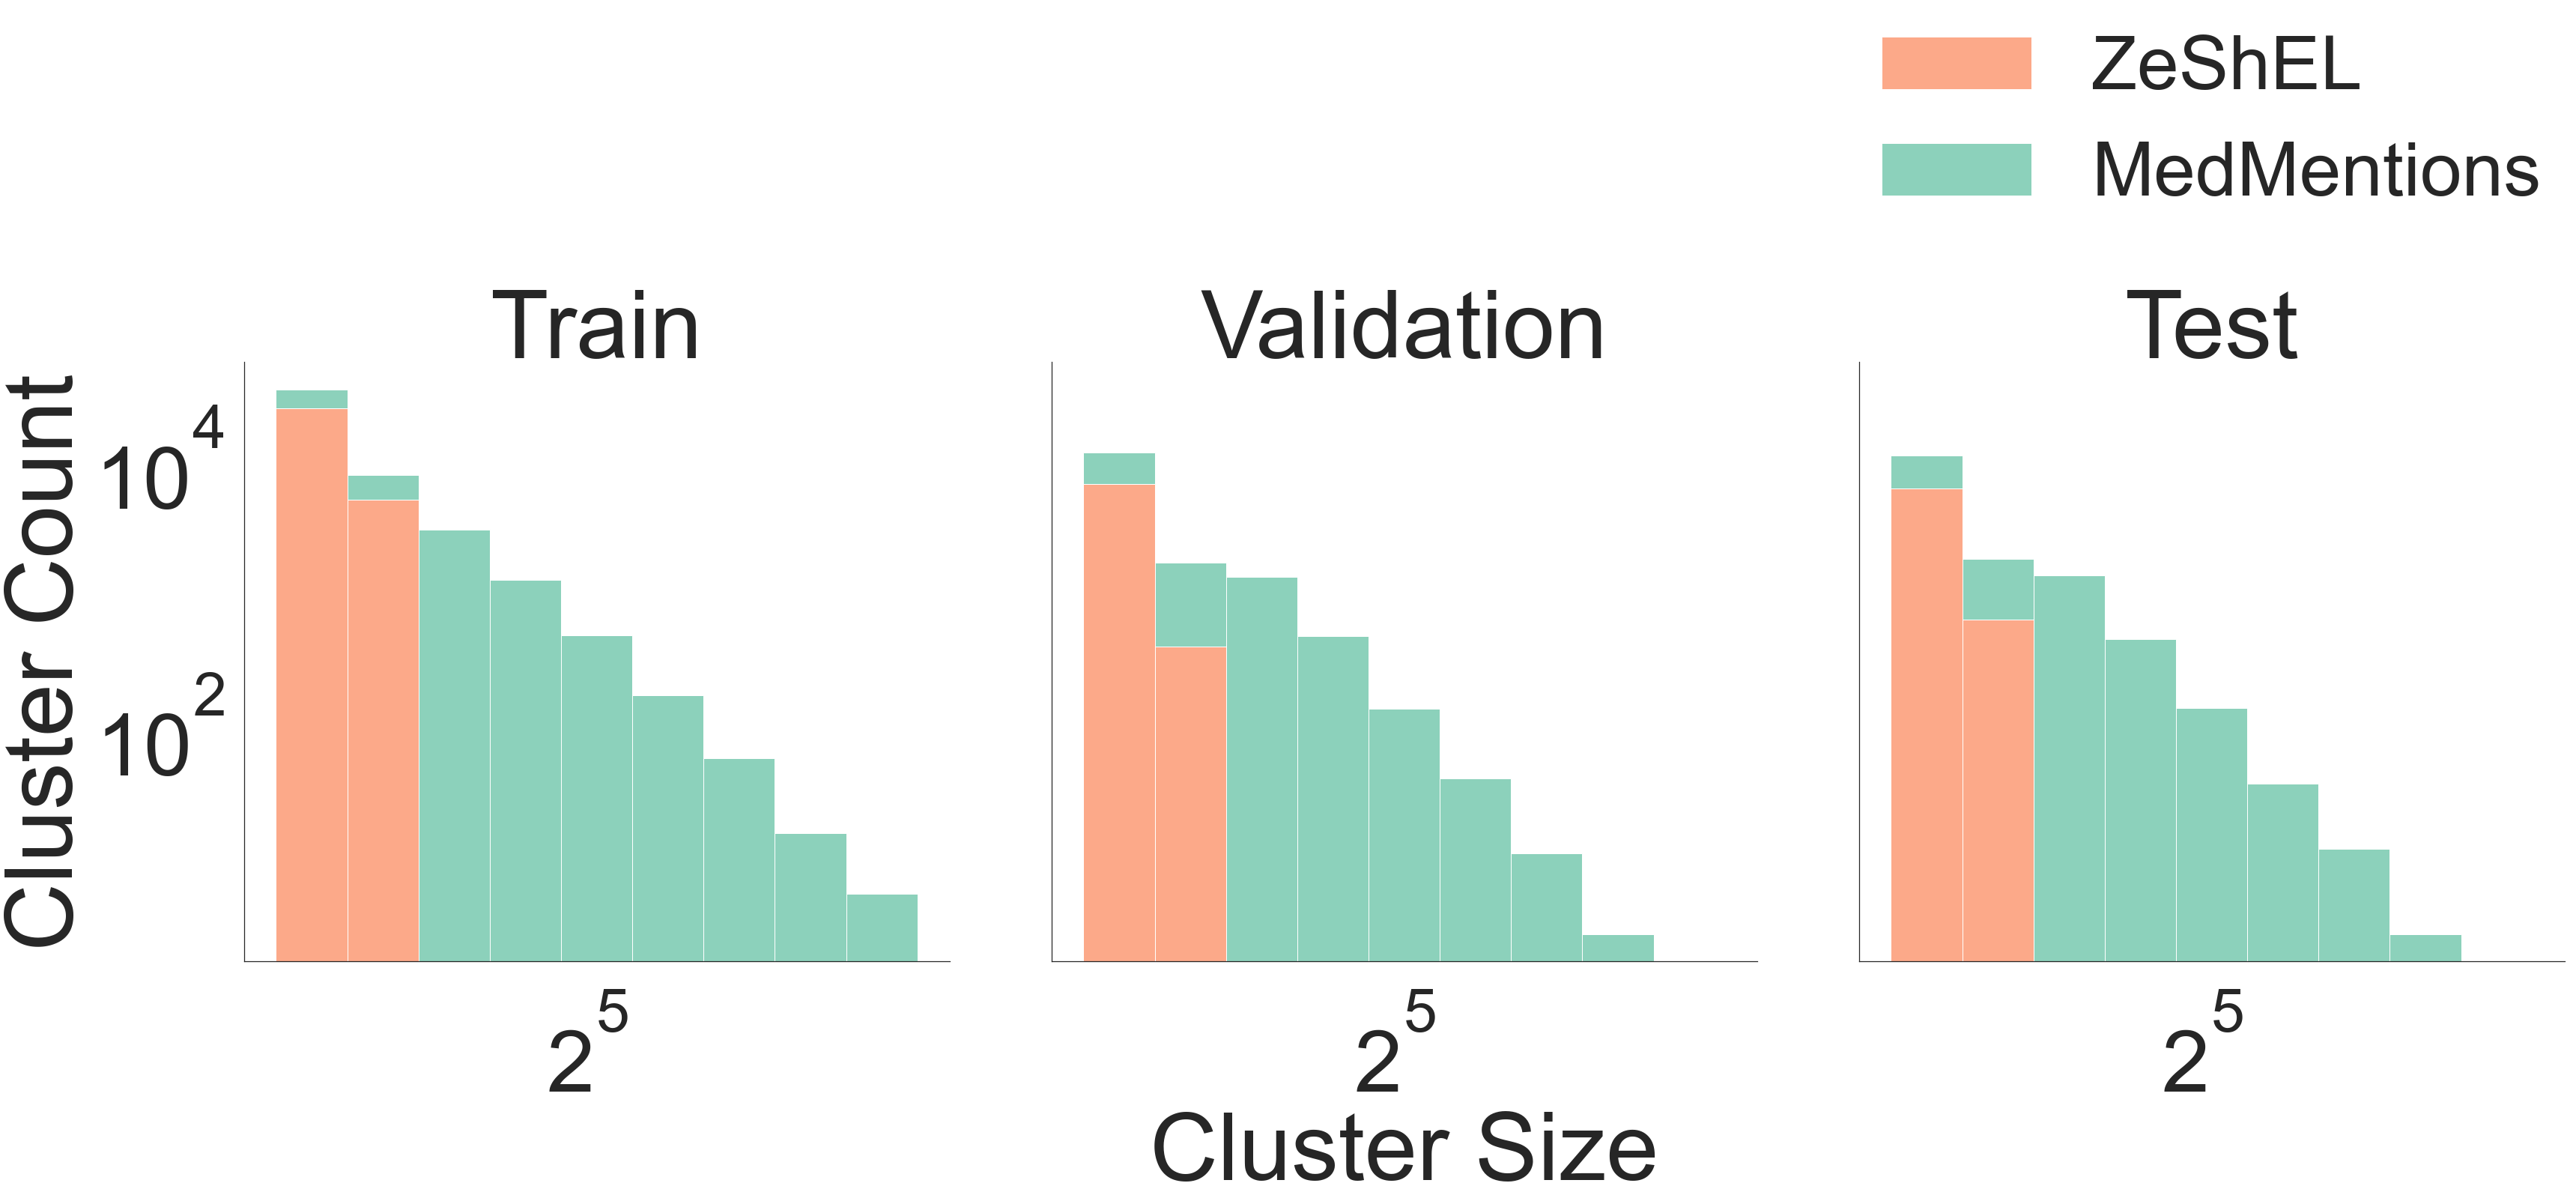

In [293]:
sns.set_style("white")
sns.set(font_scale=10.5, style="white")

g = sns.displot(df_coref, fill=True, x="count",
                log_scale=[2,10], bins=9, height=20, aspect=17/20, hue="Dataset", multiple="stack", col="Split",
                legend=False, palette="Set2").set_axis_labels(
                    "Cluster Size", "Cluster Count")  #.set(title='Gold Coreference')
plt.legend(loc='center', labels=['ZeShEL', 'MedMentions'], framealpha=0, bbox_to_anchor=(0.5,1.4), fontsize=100)  # title='Dataset', 
for axis in g.axes_dict:
    g.axes_dict[axis].set_title(axis)
    g.axes_dict[axis].xaxis.set_tick_params(pad=50)
    g.axes_dict[axis].yaxis.set_tick_params(pad=20)
    if axis != 'Validation':
        g.axes_dict[axis].set_xlabel("")
plt.savefig('zzz_cluster_distribution.pdf', format='pdf', transparent=True, bbox_inches='tight')

/Users/dhdhagar/.pyenv/versions/anaconda3-2020.02/envs/blink37/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning:

Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.

/Users/dhdhagar/.pyenv/versions/anaconda3-2020.02/envs/blink37/lib/python3.7/site-packages/matplotlib/axes/_base.py:276: FutureWarning:

Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.

/Users/dhdhagar/.pyenv/versions/anaconda3-2020.02/envs/blink37/lib/python3.7/site-packages/matplotlib/axes/_base.py:278: FutureWarning:

Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.



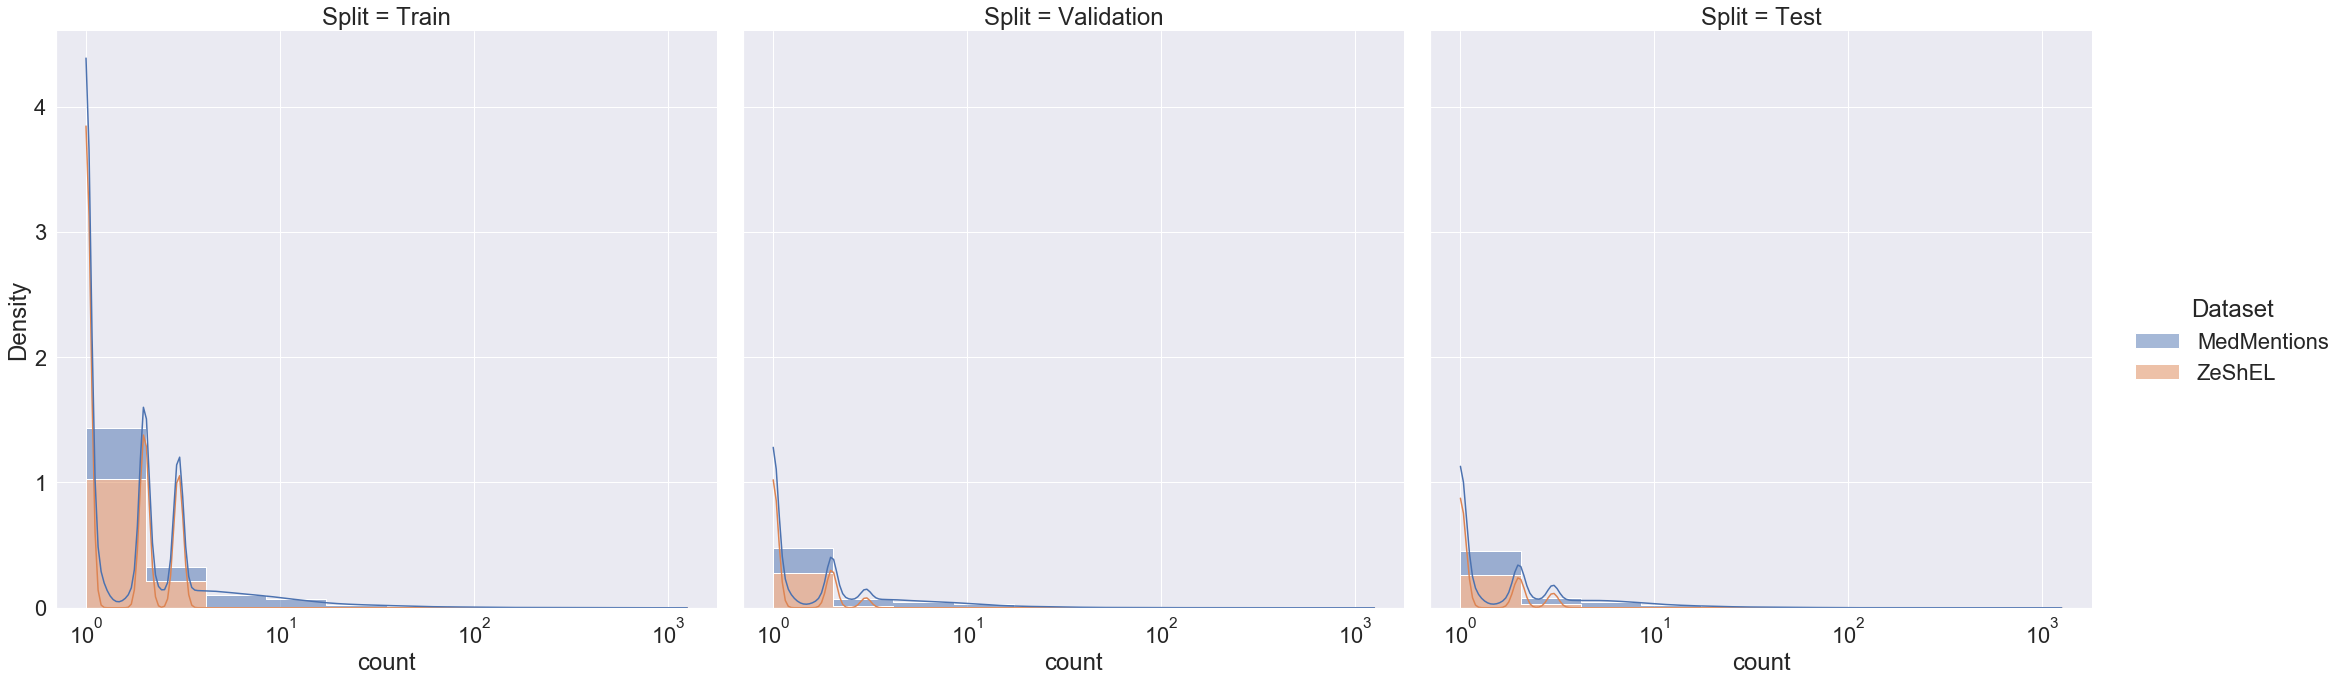

In [310]:
g = sns.displot(df_coref, fill=True, x="count",
                log_scale=[10,False], bins=10, height=10, hue="Dataset", element="step", col="Split", multiple="stack",stat="density",kde=True,
                legend=True)#.set_axis_labels(
                    #"Cluster Size", "Number of Clusters")#.set(title='Gold Coreference')
# plt.legend(title='Dataset', loc='upper right', labels=['ZeShEL', 'MedMentions'])


In [248]:
df_coref["Dataset"] = df_coref["Dataset"].apply(lambda x: "MedMentions" if x=="medmentions" else "ZeShEL")

0        MedMentions
1        MedMentions
2        MedMentions
3        MedMentions
4        MedMentions
            ...     
81811         ZeShEL
81812         ZeShEL
81813         ZeShEL
81814         ZeShEL
81815         ZeShEL
Name: Dataset, Length: 81816, dtype: object

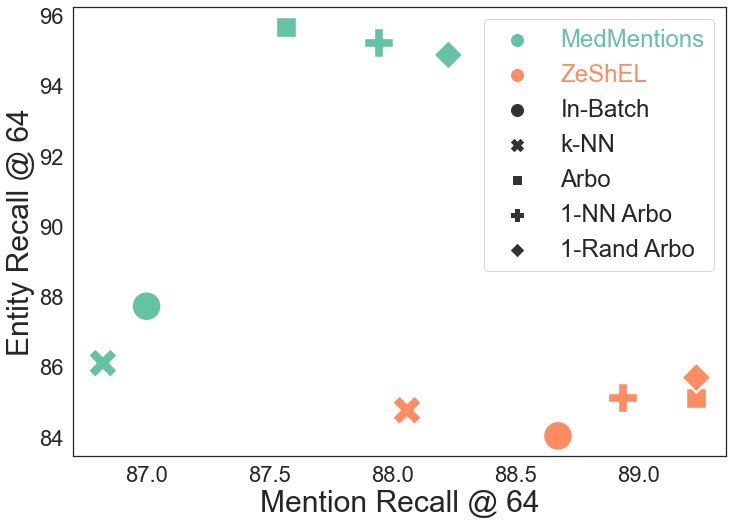

In [307]:
sns.set(font_scale=2, style="white")

# Medmentions
df_recall = {"Mention Recall": [], "Linking Recall": [], "Dataset": []}
df_recall["Mention Recall"] = [86.99803331119558, 86.82025040880704, 87.56754058221762, 87.94404968229327, 88.22652263758969] + [88.67267513314215, 88.05817287996722, 89.23596886521917, 88.9389594428513, 89.23596886521917]
df_recall["Linking Recall"] = [87.73, 86.11, 95.67, 95.23, 94.88] + [84.04, 84.77, 85.11, 85.13, 85.70]
df_recall["Dataset"] = ["MedMentions"]*5 + ["ZeShEL"]*5
df_recall["Method"] = ["In-Batch", "k-NN", "Arbo", "1-NN Arbo", "1-Rand Arbo"]*2

g = sns.scatterplot(data=pd.DataFrame(df_recall), x="Mention Recall", y="Linking Recall", 
                hue="Dataset", style="Method", s=900, palette="Set2")
g.axes.set_xlabel("Mention Recall @ 64", fontsize=30)
g.axes.set_ylabel("Entity Recall @ 64", fontsize=30)
# g.axes.set_fontsize(10)
# g.legend().texts = g.legend().texts[1:3] + g.legend().texts[4:]
handles, labels = g.get_legend_handles_labels()
leg = g.legend(markerscale=2, handles=handles[1:3]+handles[4:], 
               labels=labels[1:3]+labels[4:],
#          labels=["$\\bf{MedMentions}$", "$\\bf{ZeShEL}$"]+labels[4:],
              fontsize="medium")
for i,text in enumerate(leg.get_texts()):
    if i == 0: 
        text.set_color("#66C2A5")
    if i == 1:
        text.set_color("#FC8D62")
    
# sns.lineplot(data=pd.DataFrame(df_recall), x="Mention Recall", y="Linking Recall", 
#                 hue="Dataset", markers=True, palette="Set2", legend=False, linewidth=1, alpha=0.5)
plt.savefig('zzz_recall64_scatter.pdf', format='pdf', transparent=True, bbox_inches='tight')

In [229]:
labels

['Dataset',
 'MedMentions',
 'ZeShEL',
 'Method',
 'In-Batch',
 'k-NN',
 'Arbo',
 '1-NN Arbo',
 '1-Rand Arbo']